# **1. Import Library**

At this stage, several Python libraries required for data analysis and machine learning model development are imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# **2. Loading Clustering Result Dataset**

Loading the [clustering result dataset](https://github.com/nairkivm/clustering-people) into a Pandas Dataframe.

In [5]:
file = "https://raw.githubusercontent.com/nairkivm/clustering-people/refs/heads/main/clustering_result.csv"
salary_df = pd.read_csv('clustering_result.csv')

Review the data structure

In [6]:
salary_df.shape

(28492, 9)

In [7]:
salary_df.head()

,education_num_scaled,hours_per_week_scaled,log_age_scaled,marital_status_ Married-civ-spouse,relationship_ Husband,education,age_level,hours_per_week_level,cluster
0,1.091374,-0.046192,0.155809,0,0,Bachelors,Dewasa Tengah,Waktu Penuh,0
1,1.091374,-1.915557,0.853721,1,1,Bachelors,Dewasa Akhir,Waktu Paruh,1
2,-0.412692,-0.046192,0.083079,0,0,HS-grad,Dewasa Tengah,Waktu Penuh,0
3,-1.164724,-0.046192,1.017920,1,1,11th,Dewasa Akhir,Waktu Penuh,1
4,1.091374,-0.046192,-0.768005,1,0,Bachelors,Dewasa Muda,Waktu Penuh,0


In [8]:
salary_df.describe().T

,count,mean,std,min,25%,50%,75%,max
education_num_scaled,28492.0,1.718251e-16,1.000018,-3.420823,-0.412692,-0.036675,1.091374,2.219423
hours_per_week_scaled,28492.0,-2.348297e-02,0.838132,-1.915557,-0.201973,-0.046192,0.343259,1.511611
log_age_scaled,28492.0,-3.770675e-16,1.000018,-2.138065,-0.768005,0.083079,0.738798,2.517113
marital_status_ Married-civ-spouse,28492.0,4.453180e-01,0.497010,0.000000,0.000000,0.000000,1.000000,1.000000
relationship_ Husband,28492.0,3.850204e-01,0.486609,0.000000,0.000000,0.000000,1.000000,1.000000
cluster,28492.0,4.108522e-01,0.491997,0.000000,0.000000,0.000000,1.000000,1.000000


Because there is only two clusters, we can perform binary classification.

# **3. Data Splitting**

The Data Splitting stage aims to divide the dataset into two parts: the training set and the test set.

But before splitting it, we separate the features and target first.

In [9]:
# Separate features (X) and target (y)
X = salary_df.drop(columns=['education', 'age_level', 'hours_per_week_level', 'cluster'])
y = salary_df['cluster']

Scale the features with MinMaxScaler to enhance the performance model.

In [11]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()

numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

In [12]:
# Split the data into training and test sets
def split_data(X: pd.DataFrame, y: pd.Series) -> pd.DataFrame:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
    print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y)

Training set shape: X_train=(22793, 5), y_train=(22793,)
Test set shape: X_test=(5699, 5), y_test=(5699,)


# **4. Building Classification Model**


## **a. Building Classification Model**

Here's a brief summary of each classification algorithm that will be applied:

### K-Nearest Neighbors (KNN)

- **Description:** An algorithm that classifies data based on proximity to other data points in the feature space.
- **Advantages:** Easy to understand and implement, does not require assumptions about data distribution.
- **Disadvantages:** Slow for large datasets, sensitive to feature scaling.
- **Suitable Cases:** Pattern recognition, anomaly detection.
- **Unsuitable Cases:** Large datasets, data with many features.

### Logistic Regression (LR)

- **Description:** An algorithm that uses a logistic function to model the probability of an event occurring.
- **Advantages:** Easy to interpret, fast for large datasets.
- **Disadvantages:** Does not work well with non-linear data, requires independence assumptions among features.
- **Suitable Cases:** Binary prediction, risk analysis.
- **Unsuitable Cases:** Data with complex non-linear relationships.

### Decision Tree (DT)

- **Description:** An algorithm that uses a tree structure to make decisions based on data features.
- **Advantages:** Easy to interpret, does not require data normalization.
- **Disadvantages:** Prone to overfitting, performance can be poor on imbalanced data.
- **Suitable Cases:** Decision analysis, classification with clear rules.
- **Unsuitable Cases:** Large datasets with many features.

### Random Forest (RF)

- **Description:** An ensemble algorithm that combines multiple decision trees to improve accuracy.
- **Advantages:** Reduces overfitting, works well with imbalanced data.
- **Disadvantages:** Difficult to interpret, requires significant computational resources.
- **Suitable Cases:** Complex classification, prediction with imbalanced data.
- **Unsuitable Cases:** Applications requiring clear model interpretation.

### Support Vector Machine (SVM)

- **Description:** An algorithm that finds the best hyperplane to separate classes in the feature space.
- **Advantages:** Effective for high-dimensional data, works well with clear margins.
- **Disadvantages:** Slow for large datasets, requires precise parameter tuning.
- **Suitable Cases:** Text classification, face recognition.
- **Unsuitable Cases:** Large datasets, data with a lot of noise.

### Naive Bayes (NB)

- **Description:** A probabilistic algorithm that uses Bayes' Theorem with the assumption of feature independence.
- **Advantages:** Fast and efficient, works well with categorical data.
- **Disadvantages:** Independence assumption is often unrealistic, performance can be poor with highly correlated data.
- **Suitable Cases:** Text classification, spam detection.
- **Unsuitable Cases:** Data with highly dependent features.

I aim to use Logistic Regression (LR) as our final model, but because the dataset is relatively small, I will use apply all these algorithms and compare it.

In [13]:
# Create models
def create_models(X_train, y_train):
    knn = KNeighborsClassifier().fit(X_train, y_train)
    print('Creating K-Nearest Neighbors (KNN) model done')
    lr = LogisticRegression().fit(X_train, y_train)
    print('Creating Logistic Regression (LR) model done')
    dt = DecisionTreeClassifier().fit(X_train, y_train)
    print('Creating Decision Tree (DT) model done')
    rf = RandomForestClassifier().fit(X_train, y_train)
    print('Creating Random Forest (RF) model done')
    svm = SVC().fit(X_train, y_train)
    print('Creating Support Vector Machine (SVM) model done')
    nb = GaussianNB().fit(X_train, y_train)
    print('Creating Naive Bayes (NB) model done')
    return knn, lr, dt, rf, svm, nb

print(f'{"-"*40}\nCreating models\n{"-"*40}')
knn, lr, dt, rf, svm, nb = create_models(X_train, y_train)
models = {
    'K-Nearest Neighbors (KNN)': knn,
    'Logistic Regression (LR)': lr,
    'Decision Tree (DT)': dt,
    'Random Forest (RF)': rf,
    'Support Vector Machine (SVM)': svm,
    'Naive Bayes (NB)': nb
}
print('done')

----------------------------------------
Creating models
----------------------------------------
Creating K-Nearest Neighbors (KNN) model done
Creating Logistic Regression (LR) model done
Creating Decision Tree (DT) model done
Creating Random Forest (RF) model done
Creating Support Vector Machine (SVM) model done
Creating Naive Bayes (NB) model done
done


## **b. Model Evaluation**

**Evaluating the model**
- Display performance metrics, namely accuracy, precision, recall, and F-1 score
- To check for overfitting, look at the learning curve graph and MSE metrics from the training and test data
- Choose the model with the best performance

In [14]:
# Evaluate the models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    cm = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1-Score': f1_score(y_test, y_test_pred),
        'MSE_train': mean_squared_error(y_train, y_train_pred),
        'MSE_test': mean_squared_error(y_test, y_test_pred)
    }
    
    return results

evaluations = {}
rows = []

print(f'{"-"*40}\nEvaluating models\n{"-"*40}')
for name, model in models.items():
    results = evaluate_model(model, X_train, y_train, X_test, y_test)
    evaluations[name] = results
    rows.append({
        'Model': name,
        'Accuracy': results['Accuracy'],
        'Precision': results['Precision'],
        'Recall': results['Recall'],
        'F1-Score': results['F1-Score'],
        'MSE_train': results['MSE_train'],
        'MSE_test': results['MSE_train']
    })
    print(f"Evaluating {name} model done")

# Convert the dictionary into a dataframe
summary_df = pd.DataFrame(rows)

----------------------------------------
Evaluating models
----------------------------------------
Evaluating K-Nearest Neighbors (KNN) model done
Evaluating Logistic Regression (LR) model done
Evaluating Decision Tree (DT) model done
Evaluating Random Forest (RF) model done
Evaluating Support Vector Machine (SVM) model done
Evaluating Naive Bayes (NB) model done


Displaying the confusion matrix

----------------------------------------
Displaying confusion matrix with K-Nearest Neighbors (KNN) model
----------------------------------------


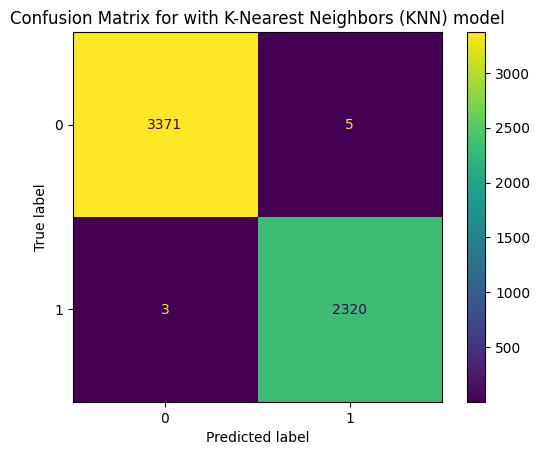

----------------------------------------
Displaying confusion matrix with Logistic Regression (LR) model
----------------------------------------


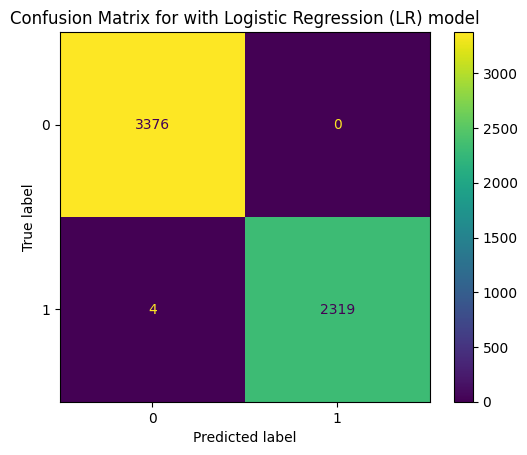

----------------------------------------
Displaying confusion matrix with Decision Tree (DT) model
----------------------------------------


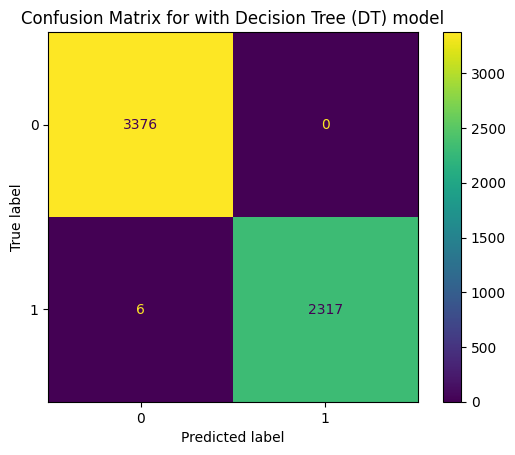

----------------------------------------
Displaying confusion matrix with Random Forest (RF) model
----------------------------------------


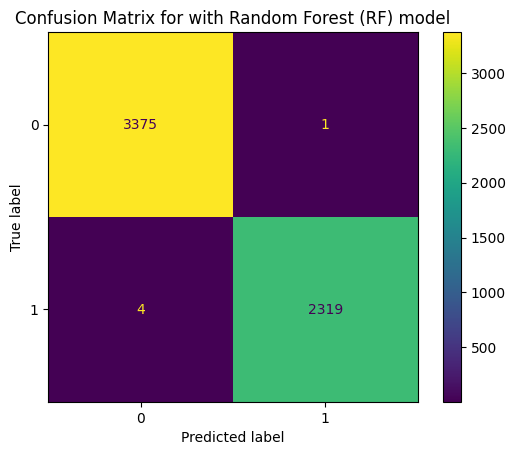

----------------------------------------
Displaying confusion matrix with Support Vector Machine (SVM) model
----------------------------------------


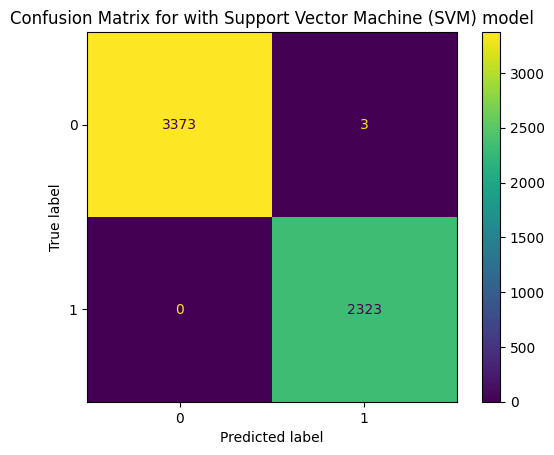

----------------------------------------
Displaying confusion matrix with Naive Bayes (NB) model
----------------------------------------


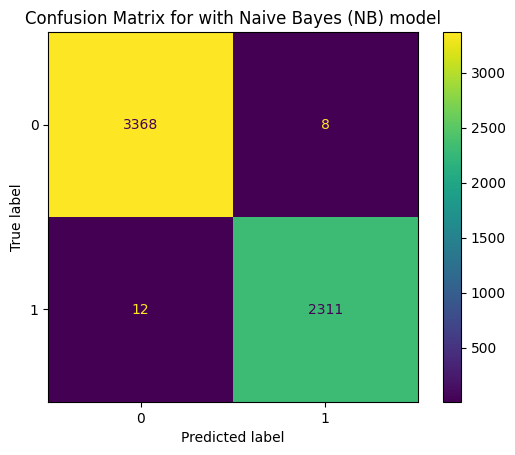

In [15]:
# Display confusion matrix
for name, model in models.items():
    print(f'{"-"*40}\nDisplaying confusion matrix with {name} model\n{"-"*40}')
    fig, ax = plt.subplots()
    cm = evaluations[name]['Confusion Matrix']
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax)
    ax.grid(False)

    ax.set_title(f'Confusion Matrix for with {name} model')
    plt.show()

Displaying the performance matrix

In [16]:
# Display the performance matrix
summary_df

,Model,Accuracy,Precision,Recall,F1-Score,MSE_train,MSE_test
0,K-Nearest Neighbors (KNN),0.998596,0.997849,0.998709,0.998279,0.000834,0.000834
1,Logistic Regression (LR),0.999298,1.000000,0.998278,0.999138,0.000395,0.000395
2,Decision Tree (DT),0.998947,1.000000,0.997417,0.998707,0.000000,0.000000
3,Random Forest (RF),0.999123,0.999569,0.998278,0.998923,0.000000,0.000000
4,Support Vector Machine (SVM),0.999474,0.998710,1.000000,0.999355,0.000570,0.000570
5,Naive Bayes (NB),0.996491,0.996550,0.994834,0.995692,0.004080,0.004080


In [20]:
# Displaying the models performances orderd by the best metrics
summary_2 = []

for metrics in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    summary_2.append(
        summary_df
        .sort_values(by=[metrics], ascending=False)
        [['Model']]
        .rename(columns={'Model': metrics})
        .reset_index(drop=True)
    )

summary_2_df = pd.concat(summary_2, axis=1)

In [21]:
summary_2_df

,Accuracy,Precision,Recall,F1-Score
0,Support Vector Machine (SVM),Logistic Regression (LR),Support Vector Machine (SVM),Support Vector Machine (SVM)
1,Logistic Regression (LR),Decision Tree (DT),K-Nearest Neighbors (KNN),Logistic Regression (LR)
2,Random Forest (RF),Random Forest (RF),Logistic Regression (LR),Random Forest (RF)
3,Decision Tree (DT),Support Vector Machine (SVM),Random Forest (RF),Decision Tree (DT)
4,K-Nearest Neighbors (KNN),K-Nearest Neighbors (KNN),Decision Tree (DT),K-Nearest Neighbors (KNN)
5,Naive Bayes (NB),Naive Bayes (NB),Naive Bayes (NB),Naive Bayes (NB)


Displaying learning curve graph so we can determine whether the model "learns" overtime (prevent underfitting/overfitting)

--------------------------------------------------------------------------------
Learning curve with K-Nearest Neighbors (KNN) model
--------------------------------------------------------------------------------


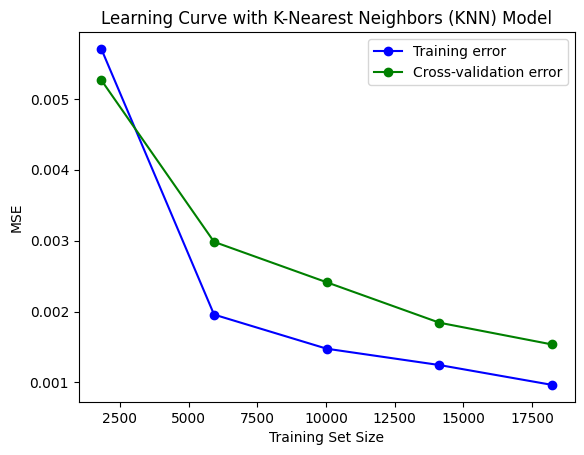

--------------------------------------------------------------------------------
Learning curve with Logistic Regression (LR) model
--------------------------------------------------------------------------------


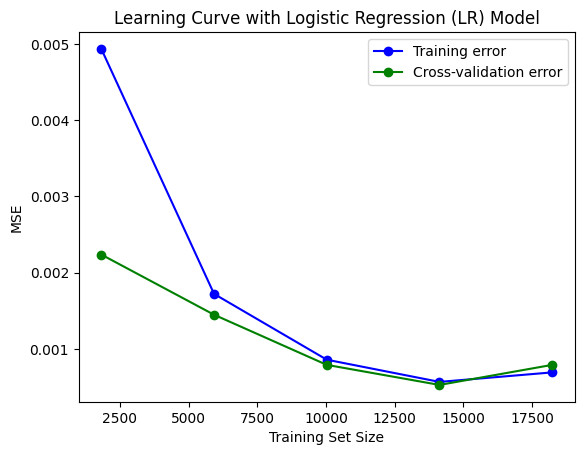

--------------------------------------------------------------------------------
Learning curve with Decision Tree (DT) model
--------------------------------------------------------------------------------


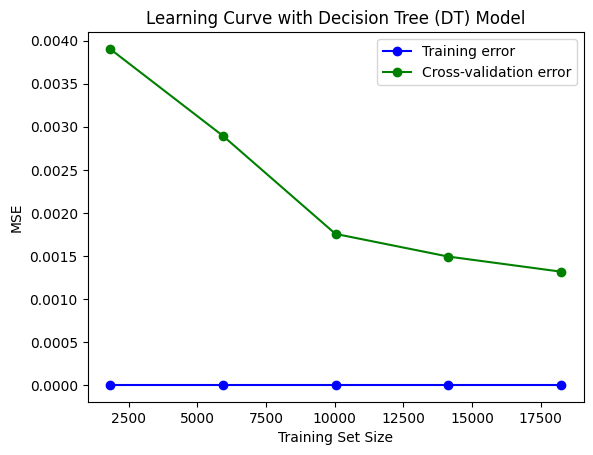

--------------------------------------------------------------------------------
Learning curve with Random Forest (RF) model
--------------------------------------------------------------------------------


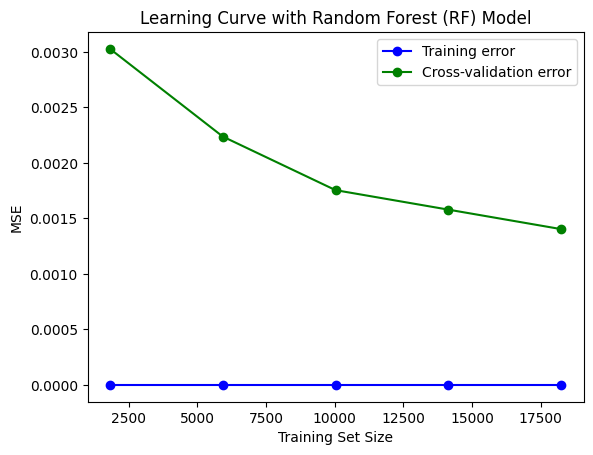

--------------------------------------------------------------------------------
Learning curve with Support Vector Machine (SVM) model
--------------------------------------------------------------------------------


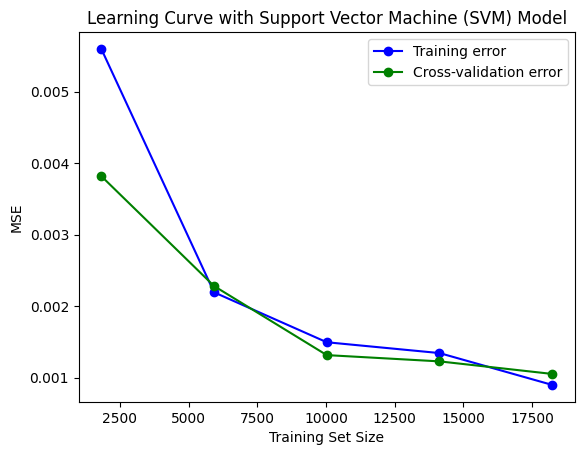

--------------------------------------------------------------------------------
Learning curve with Naive Bayes (NB) model
--------------------------------------------------------------------------------


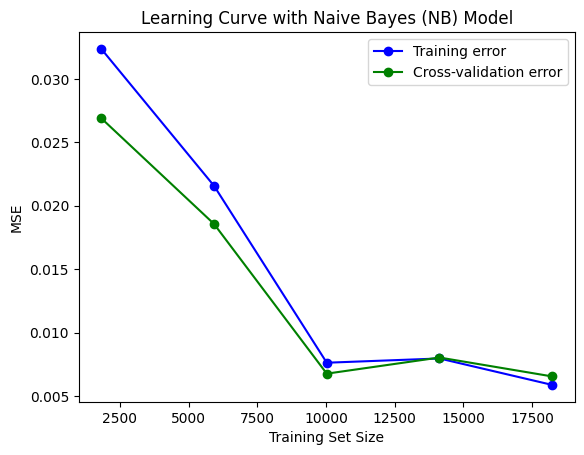

In [19]:
# Display learning curve graph
def show_learning_curve(name, model, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    train_mean = -np.mean(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training error")
    plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation error")
    plt.title(f"Learning Curve with {name} Model")
    plt.xlabel("Training Set Size")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

for name, model in models.items():
    print(f'{"-"*80}\nLearning curve with {name} model\n{"-"*80}')
    results = show_learning_curve(name, model, X_train, y_train)

**From the evaluation results above:**
- All models provide performance metrics above 90%
  - High accuracy indicates that the model can make correct predictions for almost all data.
    - Order from best to worst: SVM, LR, DT, RF, KNN, NB
  - High precision indicates that most of the positive predictions made by the model are correct.
    - Order from best to worst: LR, DT, SVM, RF, KNN, NB
  - High recall indicates that the model can detect most of the actual positive cases.
    - Order from best to worst: SVM, KNN, LR, RF, DT, NB
  - High F1-score indicates a good balance between precision and recall, so the model is not only accurate in positive predictions but also able to detect most of the actual positive cases.
    - Order from best to worst: SVM, LR, RF, DT, KNN, NB
- Since all models provide equally good results, it is necessary to check for overfitting
  - In terms of MSE training data vs. MSE test data, there is no significant difference
  - From the learning curve
    - The small and decreasing gap between training error and cross-validation as data increases indicates that the model is learning better as data increases, indicating no overfitting
      - LR, SVM, NB, KNN
- Among all models, the logistic regression (LR) model provides the best performance metrics and does not indicate overfitting. Additionally, this model also has low complexity.

In [22]:
selected_model = models['Logistic Regression (LR)']

## **c. Tuning the Model**

I use GridSearchCV to find the best hyperparameter combination

In [23]:
# Define the hyperparameters and their values
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Perform grid search
def perform_grid_search(param_grid, model, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

In [24]:
initial_params = selected_model.get_params()
best_params = perform_grid_search(param_grid, selected_model, X_train, y_train)
best_params = best_params if best_params is not None else {'C': '', 'penalty': '', 'solver': ''}

params_df = (
    pd.DataFrame(
        [initial_params, best_params],
        index=['Initial Parameter', 'Best Parameter']
    )
    .dropna(axis=1)
)

In [25]:
# Show the hyperparameters
params_df

,C,penalty,solver
Initial Parameter,1.0,l2,lbfgs
Best Parameter,100.0,l1,liblinear


## **d. Reevaluate the Model**

In [26]:
# Fit the model
new_params = params_df.loc['Best Parameter'].to_dict()
new_model = LogisticRegression(**new_params)
new_model = new_model.fit(X_train, y_train)

In [27]:
# Evaluate the model

rows = []
name = 'LR with Best Params'

print(f'{"-"*40}\nEvaluating models\n{"-"*40}')
evaluations = {}
results = evaluate_model(new_model, X_train, y_train, X_test, y_test)
evaluations[name] = results
rows.append({
    'Model': name,
    'Accuracy': results['Accuracy'],
    'Precision': results['Precision'],
    'Recall': results['Recall'],
    'F1-Score': results['F1-Score'],
    'MSE_train': results['MSE_train'],
    'MSE_test': results['MSE_train']
})
print(f"Evaluating {name} model done")

# Concat the summary to existing dataframe
summary_df = (
    pd.concat([summary_df, pd.DataFrame(rows)], axis=0)
    .reset_index(drop=True)
)

----------------------------------------
Evaluating models
----------------------------------------
Evaluating LR with Best Params model done


----------------------------------------
Displaying confusion matrix with LR with Best Params model
----------------------------------------


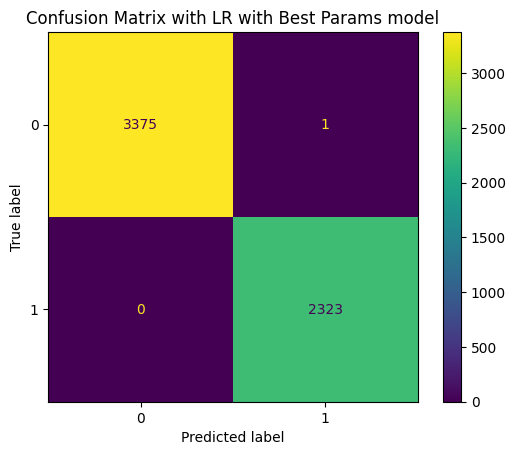

In [28]:
# Display the confusion matrix
print(f'{"-"*40}\nDisplaying confusion matrix with {name} model\n{"-"*40}')
fig, ax = plt.subplots()
cm = evaluations[name]['Confusion Matrix']
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
ax.grid(False)

ax.set_title(f'Confusion Matrix with {name} model')
plt.show()

In [29]:
summary_df

,Model,Accuracy,Precision,Recall,F1-Score,MSE_train,MSE_test
0,K-Nearest Neighbors (KNN),0.998596,0.997849,0.998709,0.998279,0.000834,0.000834
1,Logistic Regression (LR),0.999298,1.000000,0.998278,0.999138,0.000395,0.000395
2,Decision Tree (DT),0.998947,1.000000,0.997417,0.998707,0.000000,0.000000
3,Random Forest (RF),0.999123,0.999569,0.998278,0.998923,0.000000,0.000000
4,Support Vector Machine (SVM),0.999474,0.998710,1.000000,0.999355,0.000570,0.000570
5,Naive Bayes (NB),0.996491,0.996550,0.994834,0.995692,0.004080,0.004080
6,LR with Best Params,0.999825,0.999570,1.000000,0.999785,0.000044,0.000044


In [37]:
a = 0.999785
b = 0.999138
(a-b)/b

0.0006475581951642959

In [30]:
summary_2 = []

for metrics in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    summary_2.append(
        summary_df
        .sort_values(by=[metrics], ascending=False)
        [['Model']]
        .rename(columns={'Model': metrics})
        .reset_index(drop=True)
    )

summary_2_df = pd.concat(summary_2, axis=1)

In [ ]:
summary_2_df.head()

,Accuracy,Precision,Recall,F1-Score
0,LR with Best Params,Logistic Regression (LR),Support Vector Machine (SVM),LR with Best Params
1,Support Vector Machine (SVM),Decision Tree (DT),LR with Best Params,Support Vector Machine (SVM)
2,Logistic Regression (LR),LR with Best Params,K-Nearest Neighbors (KNN),Logistic Regression (LR)
3,Random Forest (RF),Random Forest (RF),Logistic Regression (LR),Random Forest (RF)
4,Decision Tree (DT),Support Vector Machine (SVM),Random Forest (RF),Decision Tree (DT)


Here we can see that the performance of the model after hyperparameter tuning is better, as it becomes the best model in it's accuracy and F1-Score.

However, is the predicted results overfit?

--------------------------------------------------------------------------------
Learning curve with LR with Best Params model
--------------------------------------------------------------------------------


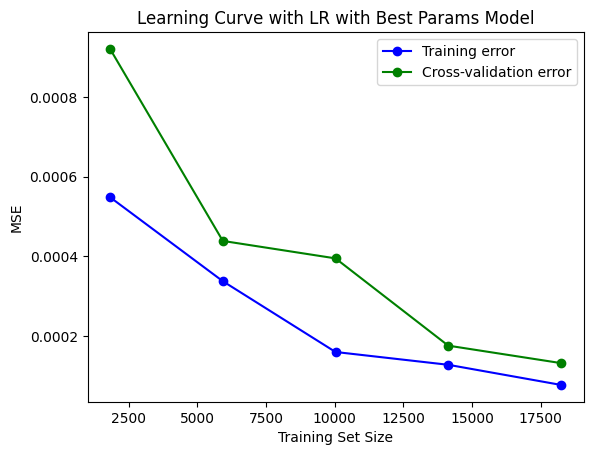

In [32]:
# Display learning curve
print(f'{"-"*80}\nLearning curve with {name} model\n{"-"*80}')
results = show_learning_curve(name, new_model, X_train, y_train)

It seems that the gap are getting narrower as it getting more training data, so there is no overfitting.

## **e. Analyze the Results**

### Evaluation Results Before vs After Hyperparameter Tuning
After tuning the hyperparameters of the Logistic Regression model from:
- C: 1, penalty: l2, solver: lbfgs
to:
- C: 100.0, penalty: l1, solver: liblinear,

it was found that *accuracy* increased by 0.05%, *precision* decreased by 0.04%, *recall* increased by 0.17%, and *F1-score* increased by 0.06%. Since the improvements are very small, the comparison is shown in terms of the number of false positives (FP) and false negatives (FN).

Default Logistic Regression vs Tuned Logistic Regression
- FP: 4 -> 0
- FN: 0 -> 1

Neither model showed indications of overfitting based on MSE of training & test data, as well as the learning curve.

### Model Weaknesses
Performance metrics close to 99% raise concerns about potential overfitting. Although RMSE and learning curves have been examined and no indications of overfitting were found, this should be monitored. More data is needed to confirm this.

### Recommendations
- Add more similar data
- Use more advanced methods to validate whether the model results are overfitting or not